## **A Lifelong Asthma Case Study: Uncovering Triggers, Patterns, and Trends Through Data**

### From Personal Health Logs to Actionable Insights: A Full Data Analysis Journey

---

**Author**: Abnerson Ocampo

**Email**: abnersonocampo@gmail.com

**Date**: Mar 26, 2025

**Data**: Personal Asthma Logs Dataset (Self-Collected, 2021–2024)

- This dataset consists of four years (2021–2024) of manually recorded asthma episodes, including symptoms, triggers, medication use, and environmental conditions. It has been structured for analysis to uncover potential patterns and trends

---

## **1. Introduction**

Asthma is a chronic respiratory condition that can be triggered by a variety of factors, including environmental conditions, physical activity, stress, and diet. While symptoms can often be managed, asthma attacks can sometimes be dangerous or even fatal if not properly controlled. Identifying triggers and recognizing patterns in asthma episodes is crucial for reducing risks and improving long-term health outcomes.

There are many studies on asthma triggers, but asthma is not a one-size-fits-all condition. Everyone has different triggers, severities, and patterns unique to their own body. What triggers a severe asthma attack in one person might have no effect on someone else. This is why a personalized, data-driven approach is necessary.

For the past four years (2021–2024), I have meticulously logged details about my **severe asthma episodes**—tracking symptoms, medications, environmental conditions, and lifestyle factors. This dataset **only includes episodes where I required nebulization**, meaning these were not minor asthma attacks that could be managed with an inhaler and/or meditation. Every recorded episode represents a **critical breathing difficulty**, where nebulization was the last step before requiring emergency intervention. This focus makes the dataset particularly valuable for identifying patterns related to **severe asthma exacerbations**.

By analyzing these logs, I aim to:

- **Identify Common Triggers**  
    - Determine which factors (e.g., sleep, stress, temperature) are most associated with severe asthma episodes.
- **Recognize Symptom Patterns**  
    - Investigate when severe asthma attacks occur most frequently (time of day, seasons, specific conditions).
- **Evaluate Medication & Treatment Effectiveness**  
    - Assess whether nebulization, medication, or other interventions successfully mitigate symptoms.
- **Develop Data-Driven Insights for Better Management**  
    - Use statistical analysis and visualizations to extract actionable takeaways for personal health improvements.

This project represents more than just a data analysis—it’s a personal journey to understand my condition in a way that I never have before. From self-collection to data cleaning, exploration, and insights, this study seeks to transform raw personal health logs into actionable findings. Not only will this analysis help optimize my asthma management, but it also serves as a testament to how data analysis can empower individuals to take control of their health.

Could you imagine showing this to my doctor? Instead of just describing my symptoms, I could present structured data—charts, trends, and insights—right on an iPad. I might even make his day; after all, how often does a patient walk in with a full data analysis of their own condition? With a clearer picture of my asthma history, we can have more informed discussions and potentially fine-tune my treatment plan for better long-term management.

I will strive to provide actionable insights and impactful recommendations every step of the way, ensuring that the analysis helps shed light on practical steps for improving asthma care.

---

### **Importing Libraries**

In [1]:
import time # Added first to calculate total run time
start_time = time.time()  # Record the start time

In [2]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from scipy.stats import pearsonr

# Data Preprocessing
from sklearn.preprocessing import OneHotEncoder

# Data Cleaning & Transformation
from scipy.stats.mstats import winsorize

# Displaying Output
from IPython.display import Markdown

### **Data Loading**

In [3]:
path = "AsthmaLogs.csv"
df = pd.read_csv(path)

---

## **2. Data Overview**

#### **Original Columns**

| **Column Name**         | **Description** |
|-------------------------|----------------|
| **Temperature (F)**     | The recorded ambient temperature (in Fahrenheit) at the time of the asthma episode. |
| **Food**               | Whether I was full or stuffed, as I sometimes had difficulty breathing when full. |
| **Position**           | The body position when the asthma symptoms began (e.g., Sitting, Laying, Standing). |
| **Time**               | The specific time when the asthma symptoms occurred. |
| **Date**               | The date of the asthma episode. |
| **Day**                | The day of the week when the episode occurred. |
| **Vitamin C**          | Whether Vitamin C was consumed before the episode (Yes/No). |
| **Vitamin D**          | Whether Vitamin D was consumed before the episode (Yes/No). |
| **Simvastatin**        | Whether Simvastatin (a medication) was taken before the episode (Yes/No). |
| **Fatigue**            | Presence of fatigue before or during the asthma episode (Yes/No). |
| **Sneeze**             | Whether sneezing occurred before the asthma episode (Yes/No).  |
| **Nebulize**           | The time I used my nebulizer during the asthma episode. |
| **Oxygen_Before_Neb (%)**  | The oxygen saturation level (%) measured before nebulization. |
| **Oxygen_During_Neb (%)**  | The oxygen saturation level (%) measured while using the nebulizer. |
| **Oxygen_After_Neb (%)**   | The oxygen saturation level (%) measured after nebulization. |
| **Neb_Worked**         | Whether the nebulizer treatment was effective in relieving symptoms (Yes/No). |
| **ECG**                | Smartwatch ECG result recorded during the asthma episode (1-lead ECG reading). |
| **HeartRate (BPM)**    | The heart rate (in beats per minute) recorded during the episode. |
| **Wheezing**           | Whether wheezing was present during the asthma episode (Yes/No). |
| **HoursOfSleep**       | The number of hours slept before the episode. |
| **StressingEvent**     | Any notable stress-related events that occurred before the asthma episode. |
| **Location**           | The general location where the asthma episode occurred (e.g., Home, Work, etc.). |
| **Note**              | Additional observations or context related to the asthma episode. |

#### **Feature-Engineered Columns**
| Column Name                     | Description                                                                            |
|----------------------------------|----------------------------------------------------------------------------------------|
| **Time_to_Nebulize**             | The time (in minutes) between the onset of an asthma attack (EpisodeTimeStamp) and when nebulization was used (NebulizeTimeStamp). This helps us understand how long it takes before intervention, which could be crucial in preventing life-threatening attacks.             |

---

#### **Dataset Information:**

In [4]:
print("Dataset Information:\n")
df.info() # shows a brief summary of the dataset showing the non-nulls and data type

print("\nData Preview")
df.head() # shows the first 5 rows of the dataset

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Temperature (F)        77 non-null     int64 
 1   Food                   77 non-null     object
 2   Position               77 non-null     object
 3   Time                   77 non-null     object
 4   Date                   77 non-null     object
 5   Day                    77 non-null     object
 6   Vitamin C              77 non-null     object
 7   Vitamin D              77 non-null     object
 8   Simvastatin            77 non-null     object
 9   Fatigue                77 non-null     object
 10  Sneeze                 77 non-null     object
 11  Nebulize               77 non-null     object
 12  Oxygen_Before_Neb (%)  77 non-null     int64 
 13  Oxygen_During_Neb (%)  77 non-null     int64 
 14  Oxygen_After_Neb (%)   77 non-null     int64 
 15  Neb

,Temperature (F),Food,Position,Time,Date,Day,Vitamin C,Vitamin D,Simvastatin,Fatigue,...,Oxygen_During_Neb (%),Oxygen_After_Neb (%),Neb_Worked,ECG,HeartRate (BPM),Wheezing,HoursOfSleep,StressingEvent,Location,Note
0,73,No,Sitting (Work),5:00 PM,11/11/21,Thursday,No,No,Yes,No,...,99,99,Yes,Sinus Rhythm,76,No,4,No,Home,NaN
1,80,Yes,Sitting (Bed),8:30 PM,12/11/21,Friday,No,No,Yes,No,...,99,99,Yes,Sinus Rhythm,81,No,7,Yes,NaN,NaN
2,76,No,Laying (Bed),3:50 AM,14/11/2021,Sunday,No,No,Yes,No,...,99,99,Yes,Sinus Rhythm,80,No,8,No,NaN,NaN
3,80,No,Laying (Bed),7:10 PM,15/11/2021,Monday,No,No,Yes,No,...,99,99,Yes,Sinus Rhythm,75,No,4,No,NaN,NaN
4,76,Yes,Sitting (Work),10:00 PM,17/11/2021,Wednesday,No,No,Yes,No,...,99,99,Yes,Sinus Rhythm,76,No,7,No,NaN,NaN


---

## **3. Data Cleaning and Data Preparation**

**Check for Null Values**

In [5]:
# Check null values
print("Null Values:\n")
print(df.isnull().sum())

Null Values:

Temperature (F)           0
Food                      0
Position                  0
Time                      0
Date                      0
Day                       0
Vitamin C                 0
Vitamin D                 0
Simvastatin               0
Fatigue                   0
Sneeze                    0
Nebulize                  0
Oxygen_Before_Neb (%)     0
Oxygen_During_Neb (%)     0
Oxygen_After_Neb (%)      0
Neb_Worked                0
ECG                       0
HeartRate (BPM)           0
Wheezing                  0
HoursOfSleep              0
StressingEvent            1
Location                 27
Note                     75
dtype: int64


---

**Check for Duplicates**

In [6]:
df.duplicated().sum()

1

---

**Drop Duplicates**

In [7]:
df = df.drop_duplicates()

---

**Drop Unnecessary Columns**

In [8]:
df = df.drop(columns = ["Location", "Note", "Oxygen_During_Neb (%)"])

---

**Check for Unique Values for Standardization**

In [9]:
def check_unique():
    categorical_columns = df.select_dtypes(include = ["object"]).columns

    for col in categorical_columns:
        unique_values = df[col].unique()
        print(f"Column: {col}")
        print(unique_values)
        print("-"*40)

check_unique()

Column: Food
['No' 'Yes']
----------------------------------------
Column: Position
['Sitting (Work)' 'Sitting (Bed)' 'Laying (Bed)' 'Sleeping'
 'Sitting (Computer)' 'Sleeping (Sofa)' 'Sleeping (Bed)' 'Sitting (PC)'
 'Sitting' 'Standing' 'Laying (Movie)' 'Laying (Sleeping)'
 'Sitting (Eating)' 'Sitting (Restaurant)' 'Sitting (Sofa)'
 "Laying (Rob's House)" 'Standing (Work)' 'Standing (Shower)']
----------------------------------------
Column: Time
['5:00 PM' '8:30 PM' '3:50 AM' '7:10 PM' '10:00 PM' '5:00 AM' '2:10 AM'
 '4:30 AM' '2:50 AM' '10:30 PM' '5:50 AM' '5:20 PM' '6:00 PM' '12:40 AM'
 '7:00 AM' '12:30 PM' '4:30 PM' '4:10 PM' '11:50 PM' '11:30 PM' '6:40 PM'
 '2:20 AM' '3:30 AM' '6:30 AM' '9:00 AM' '4:10 AM' '12:00 PM' '9:10 PM'
 '2:30 AM' '4:00 PM' '6:45 PM' '10:00 AM' '2:50 PM' '6:20 PM' '4:20 PM'
 '1:50 PM' '4:45 PM' '8:40 PM' '7:30 PM' '2:40 AM' '8:40 AM' '9:00 PM'
 '1:00 PM' '4:40 PM' '12:00 AM' '1:00 AM' '7:00 PM' '7:30 AM' '4:50 AM'
 '3:40 PM' '7:45 AM' '4:15 PM' '6:40 AM' '

---

**Filling NAs with Unknown**

In [10]:
df = df.fillna("Unknown")

---

**Standardize Object Columns**

In [11]:
categorical_columns = df.select_dtypes(include = ["object"]).columns

for col in categorical_columns:
    df[col] = df[col].astype(str).str.strip().str.title()

---

**Cleaning the Date and Time columns**

In [12]:
# Dropping duplicates
df = df.drop_duplicates()

# Function to standardize the Date column to %d/%m/%Y
def fix_year(date_str):
    parts = date_str.split('/')
    if len(parts[-1]) == 2:  # If year has only 2 digits
        parts[-1] = '20' + parts[-1]  # Convert "24" → "2024"
    return '/'.join(parts)

# Apply the fix
df["Date"] = df["Date"].apply(fix_year)

# Combine Date and Time columns and ensure proper standardized datetime format
df["EpisodeTimeStamp"] = pd.to_datetime(df["Date"] + ' ' + df["Time"], format='%d/%m/%Y %I:%M %p', errors='coerce')
df["NebulizeTimeStamp"] = pd.to_datetime(df["Date"] + ' ' + df["Nebulize"], format='%d/%m/%Y %I:%M %p', errors='coerce')

# Drop Time, Date, and Nebulize columns
df.drop(columns=["Time", "Nebulize", "Date"], inplace = True)

---

**Check if all NebulizeTimeStamps are Older than the EpisodeTimeStamps**

In [13]:
df_invalid = df[df["NebulizeTimeStamp"] < df["EpisodeTimeStamp"]]

print(df_invalid)

    Temperature (F) Food  Position     Day Vitamin C Vitamin D Simvastatin  \
20               74   No  Sleeping  Monday        No        No          No   

   Fatigue Sneeze  Oxygen_Before_Neb (%)  Oxygen_After_Neb (%) Neb_Worked  \
20      No     No                     98                    99        Yes   

             ECG  HeartRate (BPM) Wheezing  HoursOfSleep StressingEvent  \
20  Sinus Rhythm               92       No             8            Yes   

      EpisodeTimeStamp NebulizeTimeStamp  
20 2021-12-20 23:50:00        2021-12-20  


---

**Fix the Midnight Edge Case**
- Referred to source Asthma Logs file

In [14]:
df.loc[df["EpisodeTimeStamp"] == "2021-12-20 23:50:00", "NebulizeTimeStamp"] = pd.Timestamp("2021-12-21 00:00:00")

df_invalid = df[df["NebulizeTimeStamp"] < df["EpisodeTimeStamp"]]

print(df_invalid)

Empty DataFrame
Columns: [Temperature (F), Food, Position, Day, Vitamin C, Vitamin D, Simvastatin, Fatigue, Sneeze, Oxygen_Before_Neb (%), Oxygen_After_Neb (%), Neb_Worked, ECG, HeartRate (BPM), Wheezing, HoursOfSleep, StressingEvent, EpisodeTimeStamp, NebulizeTimeStamp]
Index: []


---

**Cleaning the Position column**

In [15]:
# Capture the text inside the parenthesis and put them in a new column called Position_Context
df["Position_Context"] = df["Position"].str.extract(r"\((.*?)\)")

# Fill the NAs with Unknown
df["Position_Context"] = df["Position_Context"].fillna("Unknown")

# Capture the primary position
df["Episode_Position"] = df["Position"].str.extract(r'(^\w+)')

# Drop the old column
df.drop(columns = ["Position"], inplace = True)

# Standardizing the Position_Context column
context_map = {
    'PC': 'Computer',
    'Work': 'Work',
    'Shower': 'Bathroom',
    'Sofa': 'Living Room',
    'Movie': 'Public Place',
    'Rob\'s House': 'Public Place',  
    'Restaurant': 'Public Place',
    'Eating': 'Dining',
    'Sleeping': 'Bed',  
    'Unknown': 'Unknown'
}

# Standardizing the Position_Context column
df["Position_Context"] = df["Position_Context"].replace(context_map)

# When Episode_Position is "Sleeping" AND Position_Context is "Unknown", set Position_Context to "Bedroom"
df.loc[(df["Episode_Position"] == "Sleeping") & (df["Position_Context"] == "Unknown"), "Position_Context"] = "Bed"

# Fill Unknowns with "Bed"
df.loc[df["Position_Context"] == "Unknown", "Position_Context"] = "Bed"

df["Position_Context"] = df["Position_Context"].replace({"Rob'S House" : "Public Place"})
df["Position_Context"] = df["Position_Context"].replace({"Pc" : "Computer"})


---

**Cleaning the StressingEvent Column**

In [16]:
# Filling Unknown with the Mode
StressingEventMode = df["StressingEvent"].mode()[0]
df.loc[df["StressingEvent"] == "Unknown", "StressingEvent"] = StressingEventMode

---

**Cleaning Sneeze Column**

In [17]:
Sneeze_Mode = df["Sneeze"].mode()[0]
df.loc[(df["Sneeze"] != "Yes") & (df["Sneeze"] != "No"), "Sneeze"] = Sneeze_Mode

---

### **Feature Engineering**

In this section, we create new meaningful features to enhance our analysis. Since this dataset only includes severe asthma episodes, we engineer a new feature:

- **Time_To_Nebulize**: The time (in minutes) between the onset of an asthma attack (EpisodeTimeStamp) and when nebulization was used (NebulizeTimeStamp). This helps us understand how long it takes before intervention, which could be crucial in preventing ER-level emergencies.

In [18]:
df["Time_to_Nebulize"] = (df["NebulizeTimeStamp"] - df["EpisodeTimeStamp"]).dt.total_seconds() / 60

**Winsorizing Highly Skewed Data**

Winsorization was chosen over the IQR method because:
- The column is highly disproportionate affecting the mean. 
- Preserves all data points by capping extreme values rather than removing them, ensuring we retain as much information as possible 

In [19]:
# Windsorize Highly Skewed Data
df["Time_to_Nebulize"] = winsorize(df["Time_to_Nebulize"], limits=[0, 0.05])

---

**Reordering Columns**

In [20]:
df = df.reindex(columns=[
    # 1. Episode Details (Time, Location, Position)
    'EpisodeTimeStamp', 'Day', 'Position_Context', 'Episode_Position', 'Temperature (F)',

    # 2. Nebulizer Details (Oxygen Levels, Nebulization)
    'Time_to_Nebulize', 'NebulizeTimeStamp', 'Oxygen_Before_Neb (%)', 'Oxygen_After_Neb (%)',
    'HeartRate (BPM)', 'ECG', 'Neb_Worked', 

    # 3. Health & Symptoms (Biological indicators, symptoms, lifestyle)
    'Wheezing', 'Fatigue', 'Sneeze', 'StressingEvent', 'HoursOfSleep',

    # 4. Regular Intake & Potential Triggers (Vitamins, Medication, Food)
    'Food', 'Vitamin C', 'Vitamin D', 'Simvastatin'
])

---

**Making a Copy**

In [21]:
df_encoded = df.copy()

---

**Dropping Position_Context to Avoid Too Many Columns (One Hot Encoding)**

In [22]:
df_encoded = df_encoded.drop(columns = ["Position_Context"])

---

**Binary Encoding**

In [ ]:
# Define the columns that contain Yes/No values and need Binary Encoding
binary_columns = ["Food", "Vitamin C", "Vitamin D",
                  "Simvastatin", "Fatigue", "Sneeze", "Neb_Worked", "Wheezing", "StressingEvent"]

# Replace "Yes" with 1 and "No" with 0, then convert the column data type to int8 for efficiency
df_encoded[binary_columns] = df_encoded[binary_columns].replace({"Yes": 1, "No": 0}).astype("int8")

# Encode the ECG column: Convert "Sinus Rhythm" to 1 and "Irregular Beat" to 0, then cast to int8
df_encoded["ECG"] = df_encoded["ECG"].replace({"Sinus Rhythm": 1, "Irregular Beat": 0}).astype("int8")

**Ordinal Encoding**

In [24]:
# Define the correct order of weekdays (ensuring logical ordinal encoding)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert categorical day names into numerical values (ordinal encoding)
df_encoded['Day'] = df_encoded['Day'].map(
    {day: i for i, day in enumerate(day_order)}  # Create a dictionary mapping each day to a number (Monday=0, Tuesday=1, ..., Sunday=6)
).astype("int8")  # Convert the column to int8 to save memory

**One Hot Encoding**

In [25]:
# Apply One-Hot Encoding to the 'Episode_Position' column
df_encoded = pd.get_dummies(df_encoded, columns=["Episode_Position"], drop_first=True)

# Identify the One-Hot Encoded columns
one_hot_cols = [col for col in df_encoded.columns if "Episode_Position_" in col]

# Convert the One-Hot Encoded columns to integers explicitly
df_encoded[one_hot_cols] = df_encoded[one_hot_cols].astype(int)

---

**Final Cleaning Check**

In [26]:
# Check for missing values
print(df.isna().sum())

# Check unique values in categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"Column: {col}")
    print(df[col].unique())  
    print("-" * 40)

# Check data types
df.dtypes

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_count}")

EpisodeTimeStamp         0
Day                      0
Position_Context         0
Episode_Position         0
Temperature (F)          0
Time_to_Nebulize         0
NebulizeTimeStamp        0
Oxygen_Before_Neb (%)    0
Oxygen_After_Neb (%)     0
HeartRate (BPM)          0
ECG                      0
Neb_Worked               0
Wheezing                 0
Fatigue                  0
Sneeze                   0
StressingEvent           0
HoursOfSleep             0
Food                     0
Vitamin C                0
Vitamin D                0
Simvastatin              0
dtype: int64
Column: Day
['Thursday' 'Friday' 'Sunday' 'Monday' 'Wednesday' 'Tuesday' 'Saturday']
----------------------------------------
Column: Position_Context
['Work' 'Bed' 'Computer' 'Living Room' 'Public Place' 'Dining' 'Bathroom']
----------------------------------------
Column: Episode_Position
['Sitting' 'Laying' 'Sleeping' 'Standing']
----------------------------------------
Column: ECG
['Sinus Rhythm']
---------------

---

**Export Cleaned Data to CSV**

In [27]:
# df.to_csv("cleaned_data.csv", index = False)

---

## **4. Exploratory Data Analysis and Visualizations**

Being a Data Analyst is not about making fancy charts, trying to impress your boss or co-workers. It's about producing critical actionable insights that drive change and create impact.

### **Key Questions We Aim to Answer**
Before diving into the data, we define the most important questions that will help identify patterns, triggers, and critical insights related to my severe asthma episodes.
-   4.1 - **How Long Do I Have Before My Breathing Becomes Critical?**
    -   Understanding the average delay before nebulization can help in early intervention and better preparedness.
-   4.2 - **What Factors Cause Faster Escalation to Severe Breathing Difficulty?**
    -   Knowing what triggers faster deterioration can help in preventive strategies.
-   4.3 - **How Low Does My Oxygen Level Drop Before Nebulization and Exploring Possible Correlations.**
    -   If my oxygen levels drop dangerously low before nebulization, that could mean a need for earlier intervention.
-   4.4 - **How Effective is Nebulization in Recovering My Oxygen Levels?**
    -   If some episodes take longer to recover, that could indicate the need for stronger medication or earlier intervention.
-   4.5 - **Analyzing Major Asthma Key Triggers**
    -   Turning Data Insights Into Better Asthma Management.
-   4.6 - **Is My Asthma Seasonal? Do Certain Months Have More Attacks?**
    -   If asthma attacks peak in certain months, preventive measures can be taken.
-   4.7 - **When Do My Asthma Attacks Happen?**
    -   Exploring Temporal Trends in Asthma Episodes

This keeps the analysis goal-driven and ensures findings are useful for both personal management and medical discussion with my Doctor. 

---

In [28]:
df.describe()

,EpisodeTimeStamp,Temperature (F),Time_to_Nebulize,NebulizeTimeStamp,Oxygen_Before_Neb (%),Oxygen_After_Neb (%),HeartRate (BPM),HoursOfSleep
count,76,76.000000,76.000000,76,76.000000,76.000000,76.000000,76.000000
mean,2022-08-15 07:46:22.894736896,75.236842,44.631579,2022-08-15 08:37:44.210526464,97.644737,98.815789,87.368421,5.763158
min,2021-11-11 17:00:00,68.000000,0.000000,2021-11-11 22:00:00,94.000000,98.000000,70.000000,0.000000
25%,2021-12-18 04:15:00,73.000000,10.000000,2021-12-18 04:21:15,97.000000,99.000000,77.000000,4.000000
50%,2022-04-16 04:35:00,75.000000,15.000000,2022-04-16 04:50:00,98.000000,99.000000,85.500000,6.000000
75%,2023-03-21 04:07:30,77.000000,36.250000,2023-03-21 06:52:30,99.000000,99.000000,96.000000,7.250000
max,2024-06-28 17:05:00,84.000000,300.000000,2024-06-28 17:40:00,99.000000,99.000000,115.000000,8.000000
std,NaN,3.354076,72.532446,NaN,1.185512,0.390232,11.659436,2.058274


In [29]:
df.nunique()

EpisodeTimeStamp         76
Day                       7
Position_Context          7
Episode_Position          4
Temperature (F)          13
Time_to_Nebulize         24
NebulizeTimeStamp        76
Oxygen_Before_Neb (%)     6
Oxygen_After_Neb (%)      2
HeartRate (BPM)          24
ECG                       1
Neb_Worked                1
Wheezing                  2
Fatigue                   2
Sneeze                    2
StressingEvent            2
HoursOfSleep              9
Food                      2
Vitamin C                 2
Vitamin D                 2
Simvastatin               2
dtype: int64

---

### **4.1 - Average Delay Before Nebulization: Critical Response Time Before Medical Intervention**

**Calculate Critical Response Time**

In [30]:
average_time = df["Time_to_Nebulize"].median()
print(f"Average time before nebulization: {average_time:.2f} minutes")

Average time before nebulization: 15.00 minutes


### **Critical Response Window Analysis**

On average, I nebulize **15 minutes** after the onset of a severe asthma attack.  
This metric, referred to as my **Critical Response Window**, represents the delay before reaching a state where nebulization is essential to prevent escalation to emergency intervention.  

**NOTE**: Understanding this response window is crucial, as waiting too long before nebulization could lead to more severe respiratory distress. Identifying patterns in **when and why** this delay varies can help optimize asthma management strategies.

---

### **4.2 - What Factors Cause Faster Escalation to Severe Breathing Difficulty?**

#### **Test Possible Correlations with Critical Response Window**

In [31]:
# Compute correlations with Time_to_Nebulize
correlations = df_encoded.corr()["Time_to_Nebulize"].sort_values()

# Display only the top negative correlations (potential risk factors)
print(correlations.head(15))

Temperature (F)             -0.291866
Oxygen_After_Neb (%)        -0.146106
Simvastatin                 -0.073721
StressingEvent              -0.068957
Episode_Position_Standing   -0.065673
Day                         -0.040562
Oxygen_Before_Neb (%)       -0.038757
Fatigue                     -0.025229
Vitamin D                   -0.020322
Episode_Position_Sleeping   -0.008971
Wheezing                    -0.003799
HoursOfSleep                -0.000950
Food                         0.008022
HeartRate (BPM)              0.046642
Episode_Position_Sitting     0.143859
Name: Time_to_Nebulize, dtype: float64


---

#### **Test Statistical Significance of Top Result**

*Is Temperature's Correlation Statistically Significant?*

In [32]:
r_value, p_value = pearsonr(df_encoded["Time_to_Nebulize"], df_encoded["Temperature (F)"])

print(f"Pearson Correlation Coefficient: {r_value:.4f}")
print(f"P-Value: {p_value:.4e}")

Pearson Correlation Coefficient: -0.2919
P-Value: 1.0521e-02


**Insights:**
- The p-value (0.01) is below 0.05, meaning there is strong enough evidence to suggest that temperature influences the time before nebulization.
- The negative correlation indicates that hotter temperatures are associated with faster escalation to severe breathing difficulty (shorter Time_to_Nebulize).
- While the correlation is moderate, it supports real-world asthma studies.

**NOTE**: While the correlation is moderate (-0.29), it aligns with both existing studies and personal experience—extreme temperatures, both hot and cold, can contribute to breathing difficulties. Cold air is known to constrict airways, while high temperatures and humidity can increase inflammation and respiratory strain. The correlation may not be extremely strong because asthma escalation is influenced by multiple factors, not just temperature alone. However, any insights gained from this critical variable are valuable and potentially life saving.

---

#### **Can Temperature Predict How Fast an Asthma Attack Escalates?**

*Visualizing the Relationship Between Temperature and Asthma Escalation Time*

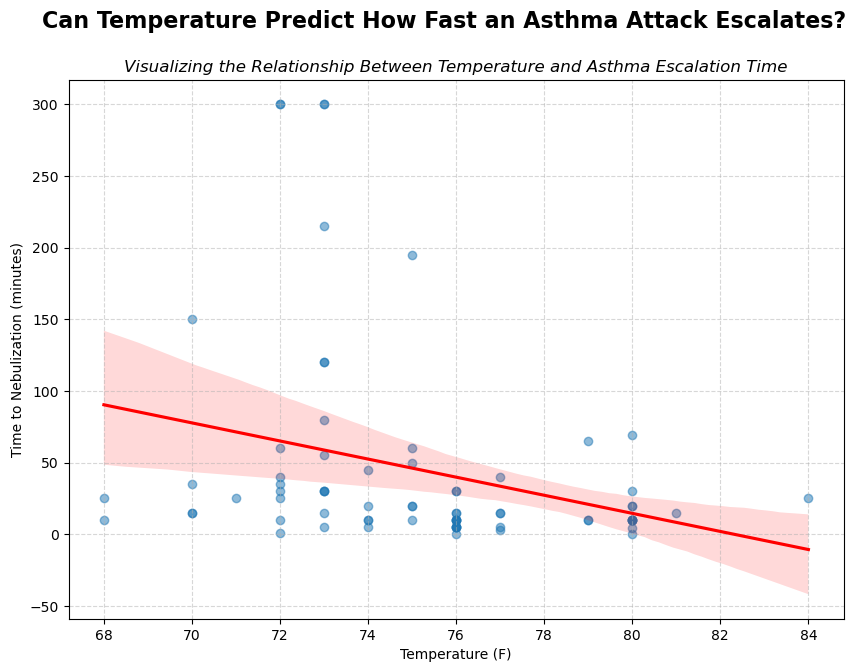

In [33]:
# Scatter plot with regression line
plt.figure(figsize=(10,7))
sns.regplot(x=df_encoded["Temperature (F)"], y=df_encoded["Time_to_Nebulize"], 
            scatter_kws={"alpha":0.5}, line_kws={"color": "red"})

plt.suptitle("Can Temperature Predict How Fast an Asthma Attack Escalates?", size = 16, fontweight = "bold")
plt.title("Visualizing the Relationship Between Temperature and Asthma Escalation Time", size = 12, fontstyle = "italic")
plt.xlabel("Temperature (F)")
plt.ylabel("Time to Nebulization (minutes)")
plt.grid(True, axis="both", linestyle="--", alpha=0.5)
plt.show()

**Insights**:
- The downward trend suggests that as temperature increases, the time before nebulization tends to shorten, indicating that higher temperatures may contribute to faster asthma escalation.
- Potential Heat-Induced Breathing Difficulty: Warmer temperatures can worsen breathing due to airway constriction, increased air pollution, and dehydration, potentially reducing the threshold for severe symptoms.
- However, temperature alone does not dictate escalation time—other factors such as allergen levels, air quality, humidity, and personal sensitivity likely play significant roles. The findings here reinforce the importance of monitoring temperature conditions as a potential trigger.

**Recommendations:**
- Regular hydration, combined with breathing exercises, can help reduce the burden on your respiratory system during hot weather.
- Avoid outdoor exposure during the hottest parts of the day, and make sure my asthma medications are easily accessible.

---

#### **Beyond the Surface: Uncovering Hidden Patterns Impacting Critical Response Time**

*Digging Deeper Beyond Initial Surface Level Correlations*

In [34]:
# Generate the markdown text dynamically using Python variables
markdown_text = """
| Asthma Trigger          | Critical Response Window (mins) |
|-------------------------|---------------------------------|
"""

# Loop through different sleep hours thresholds
sleep_hours_thresholds = [5, 4, 3, 2, 1]
for sleep_threshold in sleep_hours_thresholds:
    sleep_df = df_encoded[df_encoded["HoursOfSleep"] <= sleep_threshold]
    
    # Calculate the critical response window
    crw_sleep = sleep_df["Time_to_Nebulize"].median()

    # Add the results to the markdown table
    markdown_text += f"| Sleep-induced Episodes (<= {sleep_threshold} hours) | {crw_sleep:.1f} |\n"

# Display the generated markdown
Markdown(markdown_text)


| Asthma Trigger          | Critical Response Window (mins) |
|-------------------------|---------------------------------|
| Sleep-induced Episodes (<= 5 hours) | 27.5 |
| Sleep-induced Episodes (<= 4 hours) | 20.0 |
| Sleep-induced Episodes (<= 3 hours) | 15.0 |
| Sleep-induced Episodes (<= 2 hours) | 10.0 |
| Sleep-induced Episodes (<= 1 hours) | 7.5 |


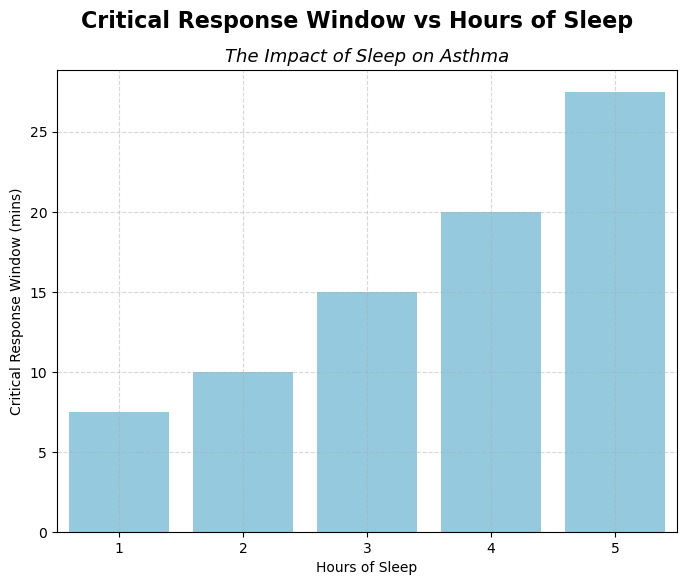

In [35]:
# Data for the plot
data = {
    'HoursOfSleep': [5, 4, 3, 2, 1],
    'CriticalResponseWindow': [27.5, 20.0, 15.0, 10.0, 7.5]
}

# Create a DataFrame
df_sleep = pd.DataFrame(data)

# Sort the DataFrame by HoursOfSleep in descending order without affecting the original df
df_sorted = df_sleep.sort_values(by="HoursOfSleep", ascending=True)

# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(x="HoursOfSleep", y="CriticalResponseWindow", data=df_sorted, color='skyblue')

# Set labels and title
plt.xlabel('Hours of Sleep')
plt.ylabel('Critical Response Window (mins)')
plt.suptitle('Critical Response Window vs Hours of Sleep', fontweight='bold', fontsize=16)
plt.title('The Impact of Sleep on Asthma', fontstyle='italic', fontsize=13)

# Display the plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

---

#### **A Hidden Discovery: Sleep’s Impact on Critical Response Time**

At first, the data seemed to show a **minimal** correlation between **Hours of Sleep** and **Critical Response Time**—a near flat -0.00095. It looked like sleep didn’t have much of an impact. But as we dug deeper, a much more intriguing pattern emerged.

When analyzing sleep-induced asthma episodes, we found that **as sleep hours decreased, the critical response window shrank** drastically:

- **Less than 6 hours of sleep?** A 27.5-minute window.
- **Less than 2 hours?** Only 7.5 minutes left to act.

What initially appeared to be a weak correlation turned into a powerful finding: **sleep deprivation directly reduces the time available for intervention during asthma attacks**. This discovery reshapes how we approach asthma care—highlighting the importance of managing sleep, not just asthma triggers.

**Recommendations**:
- Aim for at least 8 hours of sleep per night. Research indicates that this amount of sleep benefits overall health.
- Insomnia and sleep disturbances can negatively affect asthma, so addressing sleep issues with a doctor can improve both sleep quality and asthma management.
- Consider establishing a bedtime routine, reducing screen time before bed, and creating a restful environment to improve sleep quality. A consistent sleep schedule contributes to better asthma control.

---

### **4.3 - How Low Does My Oxygen Level Drop Before Nebulization?**

*Oxygen Level Distribution (Before Nebulization)*

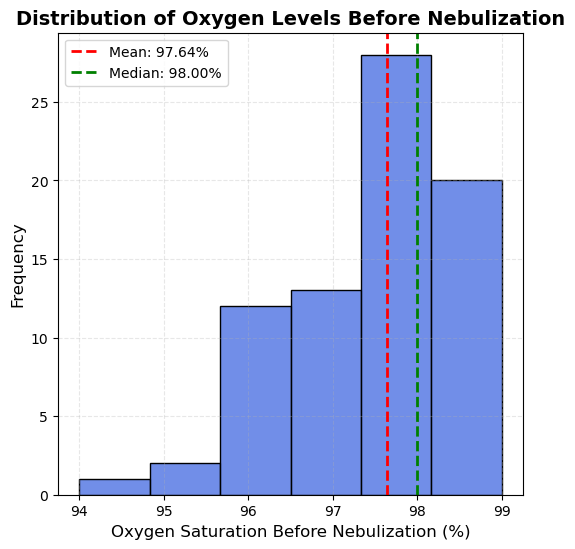

In [36]:

# Plot the distribution of Oxygen Before Nebulization
plt.figure(figsize=(6,6))
sns.histplot(df_encoded["Oxygen_Before_Neb (%)"], bins=6, kde=False, color="royalblue")

# Calculate mean and median values
mean_value = df_encoded["Oxygen_Before_Neb (%)"].mean()
median_value = df_encoded["Oxygen_Before_Neb (%)"].median()

# Add vertical lines for the mean and median
plt.axvline(mean_value, color="red", linestyle="dashed", linewidth=2, label=f"Mean: {mean_value:.2f}%")
plt.axvline(median_value, color="green", linestyle="dashed", linewidth=2, label=f"Median: {median_value:.2f}%")

# Set labels and title
plt.title("Distribution of Oxygen Levels Before Nebulization", fontsize=14, fontweight="bold")
plt.xlabel("Oxygen Saturation Before Nebulization (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()

# Add grid lines on the y-axis for clarity
plt.grid(axis="both", linestyle="--", alpha=0.3)

# Show the plot
plt.show()

**Insights:**
- Most episodes occurred within safe limits (97-98%), generally considered safe, but enough to trigger severe breathing difficulty in my personal case.
- A few instances showed oxygen levels dropping below 96% and as low as 94%, indicating rare yet potentially unsafe oxygen levels.

---

#### **Exploring Possible Variables that Influence Oxygen Levels (Before Nebulization)**

In [37]:
# Compute correlations with Oxygen Saturation Before Nebulization
correlations = df_encoded.corr()["Oxygen_Before_Neb (%)"].sort_values()

# Display the top correlations
print(correlations.head(10))

HeartRate (BPM)             -0.697469
EpisodeTimeStamp            -0.480610
NebulizeTimeStamp           -0.480562
Fatigue                     -0.331101
Food                        -0.214420
Sneeze                      -0.127716
StressingEvent              -0.125761
Episode_Position_Standing   -0.100214
Vitamin C                   -0.048074
Time_to_Nebulize            -0.038757
Name: Oxygen_Before_Neb (%), dtype: float64


---

#### **Observation: Heart Rate is Highly Correlated With Oxygen Levels Before Nebulization**

*Exploring Heart Rate Further*

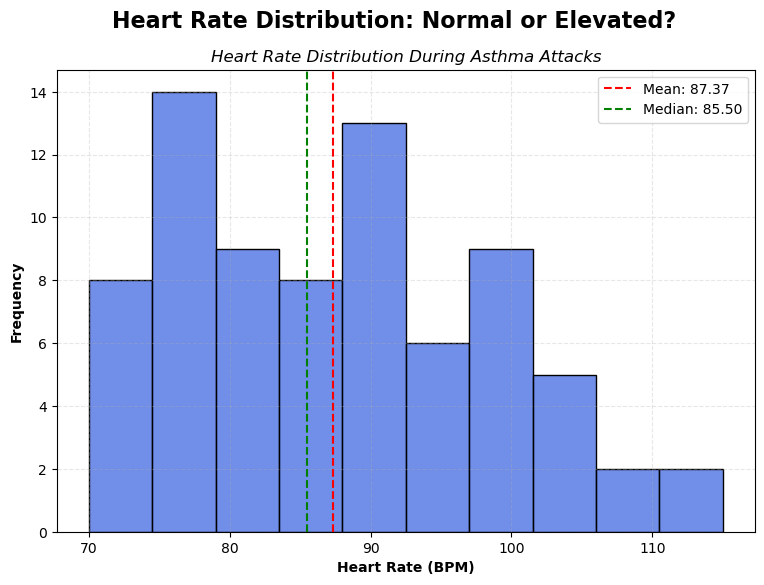

In [38]:
# Plot heart rate distribution
plt.figure(figsize=(9, 6))
sns.histplot(df["HeartRate (BPM)"], bins=10, kde=False, color="royalblue", edgecolor="black")
plt.axvline(df["HeartRate (BPM)"].mean(), color='red', linestyle='--', label=f'Mean: {df["HeartRate (BPM)"].mean():.2f}')
plt.axvline(df["HeartRate (BPM)"].median(), color='green', linestyle='--', label=f'Median: {df["HeartRate (BPM)"].median():.2f}')
plt.suptitle("Heart Rate Distribution: Normal or Elevated?", 
             fontsize = 16,
             fontweight = "bold")
plt.title("Heart Rate Distribution During Asthma Attacks", 
          fontsize = 12, 
          fontstyle = "italic")
plt.xlabel("Heart Rate (BPM)", fontweight = "bold")
plt.ylabel("Frequency", fontweight = "bold")
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend()
plt.show()

*Scatterplot: Oxygen Levels vs. Heart Rate*

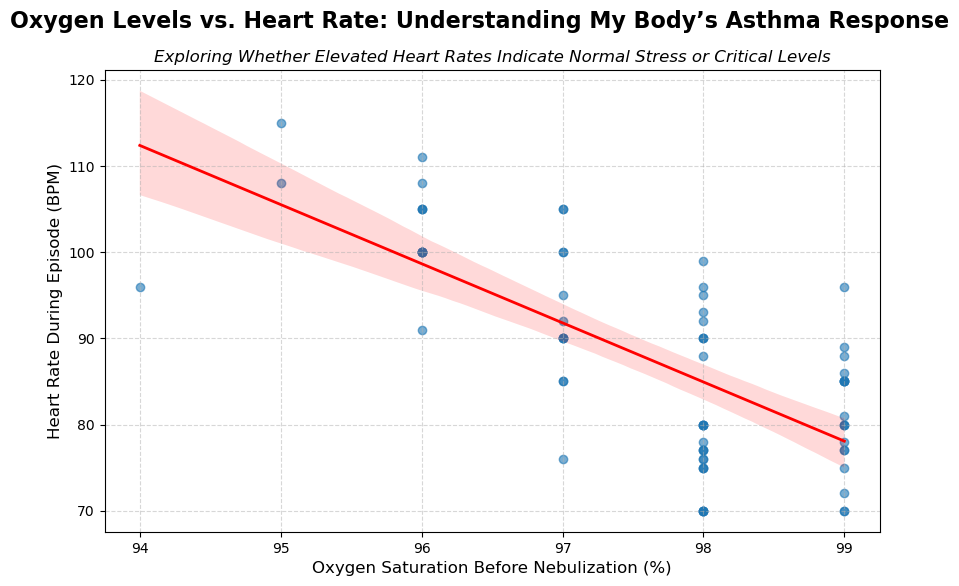

In [39]:
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x="Oxygen_Before_Neb (%)",
            y="HeartRate (BPM)",
            data=df_encoded,
            scatter_kws={"alpha": 0.6},
            line_kws={"color": "red", "linewidth": 2})

plt.suptitle("Oxygen Levels vs. Heart Rate: Understanding My Body’s Asthma Response", 
             fontsize=16, fontweight="bold")
plt.title("Exploring Whether Elevated Heart Rates Indicate Normal Stress or Critical Levels", 
          fontsize=12, fontstyle="italic")
plt.xlabel("Oxygen Saturation Before Nebulization (%)", fontsize=12)
plt.ylabel("Heart Rate During Episode (BPM)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

**Insights:**
- This robust negative correlation means there’s a clear relationship—as oxygen levels drop, heart rates significantly increase, suggesting that my body is working harder to compensate for reduced oxygen availability during severe asthma episodes.
- Most of the recorded heart rates during my asthma episodes remain within normal or mildly elevated ranges (around 85–110 BPM).
- Ensuring my heart rate stays below dangerous levels (e.g., consistently below 120 BPM) can help prevent cardiovascular stress and may serve as an additional marker of episode severity, guiding better treatment decisions.

---

### **4.4 - How Effective is Nebulization in Recovering My Oxygen Levels?**

*Oxygen Levels Before & After Nebulization*

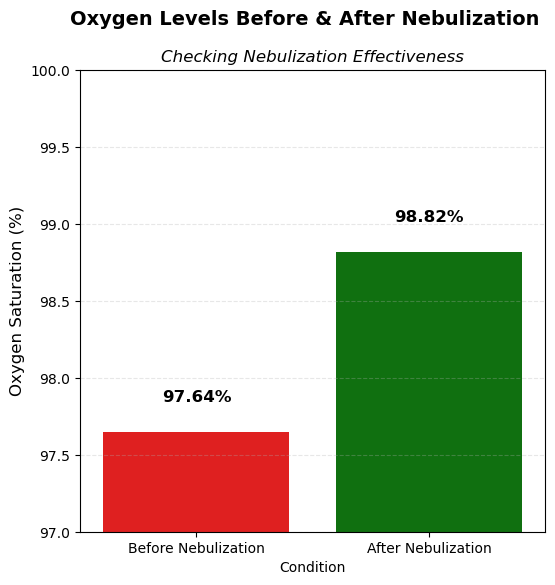

In [40]:
# Prepare data for before and after nebulization
before_after_oxygen = pd.DataFrame({
    "Condition": ["Before Nebulization", "After Nebulization"],
    "Oxygen Saturation (%)": [df_encoded["Oxygen_Before_Neb (%)"].mean(), df_encoded["Oxygen_After_Neb (%)"].mean()]
})

# Create the bar chart
plt.figure(figsize=(6, 6))
sns.barplot(x="Condition", y="Oxygen Saturation (%)", hue="Condition", data=before_after_oxygen, 
            width=0.8, palette={"Before Nebulization": "red", "After Nebulization": "green"}, legend=False)

# Add annotations
for i, value in enumerate(before_after_oxygen["Oxygen Saturation (%)"]):
    plt.text(i, value + 0.2, f"{value:.2f}%", ha="center", fontsize=12, fontweight="bold")

# Labels and title
plt.ylim(97, 100)  # Adjust y-axis to show meaningful range
plt.ylabel("Oxygen Saturation (%)", fontsize=12)
plt.suptitle("Oxygen Levels Before & After Nebulization", fontsize=14, fontweight="bold")
plt.title("Checking Nebulization Effectiveness", fontsize = 12, fontstyle = "italic")
plt.grid(True, axis="y", linestyle="--", alpha=0.3)

# Show the plot
plt.show()

**Insights:**
- **Minimal Oxygen Drop in Most Cases**: On average, my oxygen saturation before nebulization is 97.64%, indicating that my oxygen levels don’t drastically plummet during severe asthma episodes. While there are occasional cases of lower oxygen levels, they appear to be uncommon rather than the norm.
- **Effective Oxygen Recovery Post-Nebulization**: After nebulization, my oxygen saturation rises to 98.82%, suggesting that the treatment is reliably effective in restoring oxygen levels closer to normal.
- **Asthma Severity May Not Always Be Reflected in Oxygen Saturation**: Since my oxygen levels generally remain high, this suggests that severe breathing difficulty may not always be linked to oxygen desaturation, reinforcing the importance of monitoring symptoms beyond just oxygen readings.

---

### **4.5 - Analyzing Major Asthma Key Triggers**

*Turning Data Insights Into Better Asthma Management*


| Asthma Trigger          | Pearson r  | P-value       | Critical Response Window (mins) |
|-------------------------|------------|--------------|---------------------------------|
| Stress-induced Episodes | -0.7514  | 9.00e-11   | 20.0 |
| Fatigue-induced Episodes| -0.8133  | 1.54e-08   | 27.5 |
| Sneeze-induced Episodes | -0.8279  | 1.98e-06   | 35.0 |


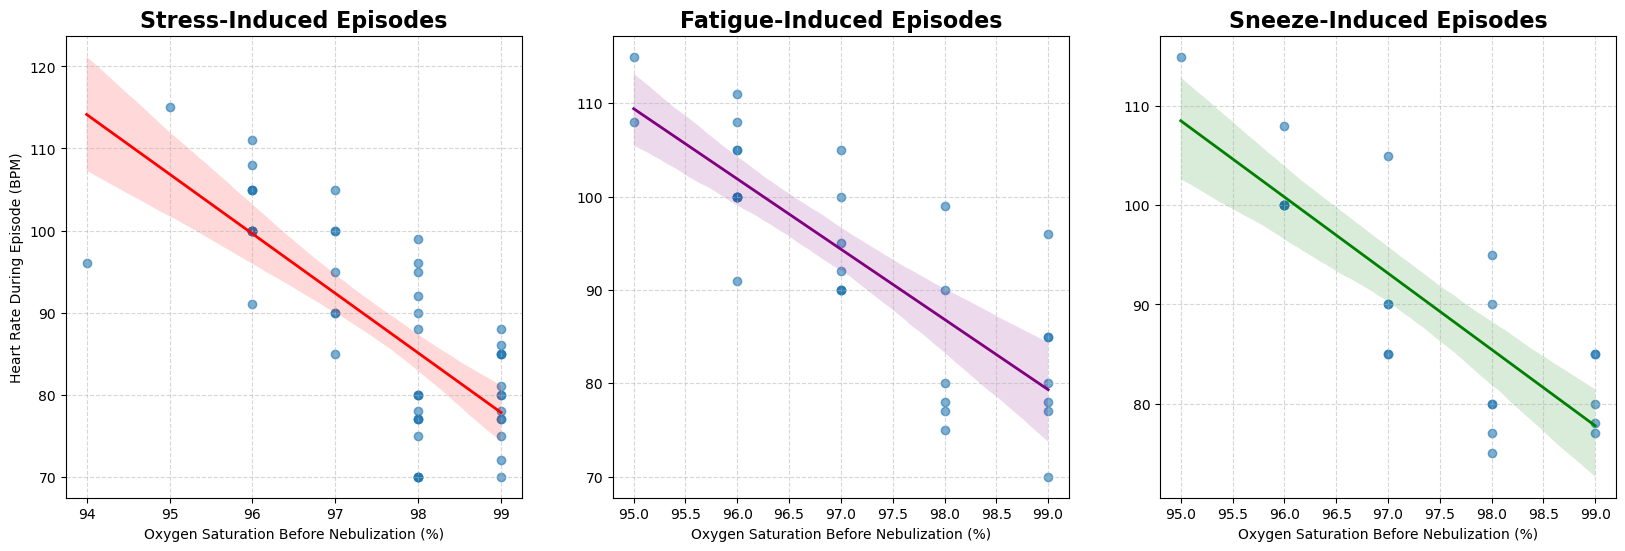

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# StressingEvent
sns.regplot(data=df_encoded[df_encoded["StressingEvent"] == 1],
            x="Oxygen_Before_Neb (%)",
            y="HeartRate (BPM)",
            scatter_kws={"alpha": 0.6}, line_kws={"color": "red", "linewidth": 2}, ax=ax[0])

ax[0].set_title("Stress-Induced Episodes", fontsize = 16, fontweight = "bold")
ax[0].set_xlabel("Oxygen Saturation Before Nebulization (%)")
ax[0].set_ylabel("Heart Rate During Episode (BPM)")
ax[0].grid(True, linestyle="--", alpha=0.5)

# Fatigue
sns.regplot(data=df_encoded[df_encoded["Fatigue"] == 1],
            x="Oxygen_Before_Neb (%)",
            y="HeartRate (BPM)",
            scatter_kws={"alpha": 0.6}, line_kws={"color": "purple", "linewidth": 2}, ax=ax[1])

ax[1].set_title("Fatigue-Induced Episodes", fontsize = 16, fontweight = "bold")
ax[1].set_xlabel("Oxygen Saturation Before Nebulization (%)")
ax[1].set_ylabel("")
ax[1].grid(True, linestyle="--", alpha=0.5)

# Sneeze
sns.regplot(data=df_encoded[df_encoded["Sneeze"] == 1],
            x="Oxygen_Before_Neb (%)",
            y="HeartRate (BPM)",
            scatter_kws={"alpha": 0.6}, line_kws={"color": "green", "linewidth": 2}, ax=ax[2])

ax[2].set_title("Sneeze-Induced Episodes", fontsize = 16, fontweight = "bold")
ax[2].set_xlabel("Oxygen Saturation Before Nebulization (%)")
ax[2].set_ylabel("")
ax[2].grid(True, linestyle="--", alpha=0.5)

# Stress-induced episodes
stress_df = df_encoded[df_encoded["StressingEvent"] == 1]
r_stress, p_stress = pearsonr(stress_df["Oxygen_Before_Neb (%)"], stress_df["HeartRate (BPM)"])
crw_stress = stress_df["Time_to_Nebulize"].median()

# Fatigue-induced episodes
fatigue_df = df_encoded[df_encoded["Fatigue"] == 1]
r_fatigue, p_fatigue = pearsonr(fatigue_df["Oxygen_Before_Neb (%)"], fatigue_df["HeartRate (BPM)"])
crw_fatigue = fatigue_df["Time_to_Nebulize"].median()

# Sneeze-induced episodes
sneeze_df = df_encoded[df_encoded["Sneeze"] == 1]
r_sneeze, p_sneeze = pearsonr(sneeze_df["Oxygen_Before_Neb (%)"], sneeze_df["HeartRate (BPM)"])
crw_sneeze = sneeze_df["Time_to_Nebulize"].median()

markdown_text = f"""
| Asthma Trigger          | Pearson r  | P-value       | Critical Response Window (mins) |
|-------------------------|------------|--------------|---------------------------------|
| Stress-induced Episodes | {r_stress:.4f}  | {p_stress:.2e}   | {crw_stress:.1f} |
| Fatigue-induced Episodes| {r_fatigue:.4f}  | {p_fatigue:.2e}   | {crw_fatigue:.1f} |
| Sneeze-induced Episodes | {r_sneeze:.4f}  | {p_sneeze:.2e}   | {crw_sneeze:.1f} |
"""

display(Markdown(markdown_text))

**Insights:**
- Stress-Induced Asthma Attacks
    - Lowest median Critical Response Window (20 minutes)—stress-induced attacks escalate rapidly, requiring immediate attention. Early intervention is crucial.
    - Stress may trigger bronchospasms, increasing airway resistance and making it harder to breathe quickly.
- Fatigue-Induced Asthma Attacls
    - Longer Critical Response Window (27.5 minutes)—while not as fast as stress-induced attacks, these episodes show a steady worsening over time.
    - Fatigue might lower lung function efficiency, making oxygen levels drop gradually.
- Sneeze-Induced Asthma Attacks
    - Strongest correlation of all triggers (r = -0.8279)—oxygen drops significantly, and heart rate spikes quickly.
    - Longest Critical Response Window (35 minutes).
    - In my experience, sneezing immediately makes it harder to breathe. Sneezing inflames the airways, causing sudden bronchoconstriction and mucus production, making breathing immediately difficult.

**Recommendations:**
- Do stress relieving activities like mindfulness and meditation, avoiding stress triggers etc.
- Monitor energy levels and rest adequately to avoid fatigue-induced attacks. Optimize sleep quality. 
- Watch out and avoid known allergies. 
- Any combinations of these different triggers may be potentially threatening. 
- Always be ready to intervene earlier instead of waiting for symptoms to worsen.


---

### **4.6 - Does Asthma Follow A Seasonal Pattern?**
***When Are Attacks the Worst***

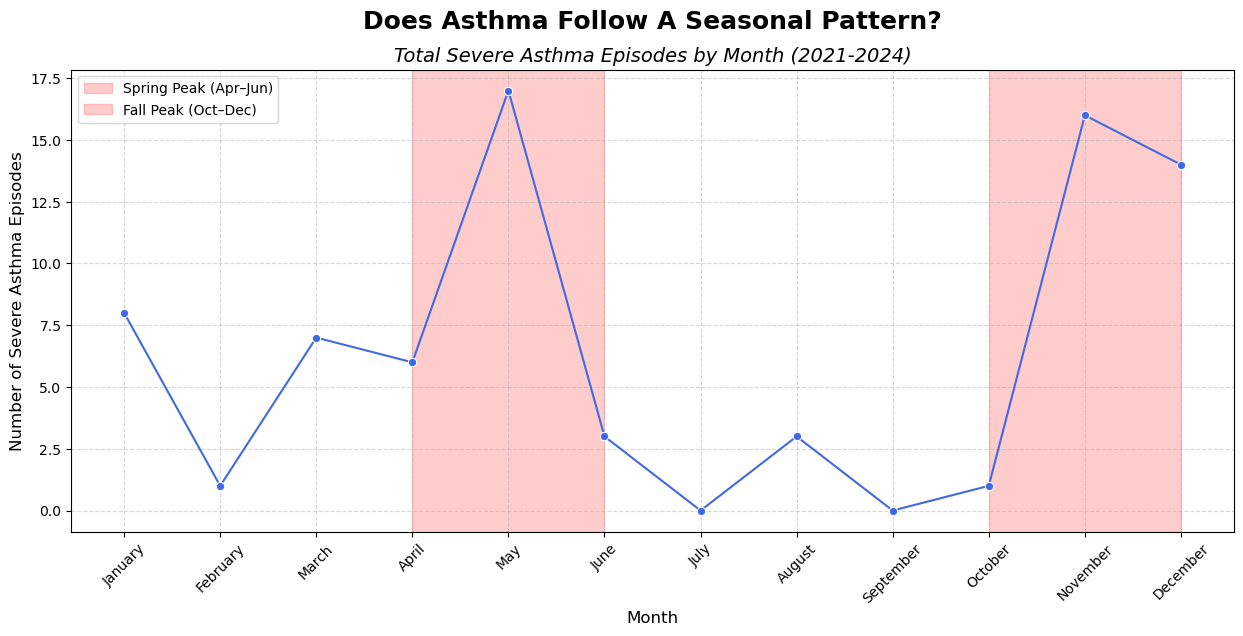

In [42]:
# Extract month names from EpisodeTimeStamp
df["Month"] = df["EpisodeTimeStamp"].dt.strftime("%B")  # Converts to 'January', 'February', etc.

# Ensure months are in order
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Count occurrences of asthma episodes per month
monthly_counts = df["Month"].value_counts().reindex(month_order, fill_value=0)

# Create figure
plt.figure(figsize=(15, 6))

# Line plot
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker="o", color="royalblue")

# Highlight April-June
plt.axvspan("April", "June", color="red", alpha=0.2, label="Spring Peak (Apr–Jun)")

# Highlight October-December
plt.axvspan("October", "December", color="red", alpha=0.2, label="Fall Peak (Oct–Dec)")

# Titles and labels
plt.suptitle("Does Asthma Follow A Seasonal Pattern?", fontsize = 18, fontweight = "bold", x = 0.5125)
plt.title("Total Severe Asthma Episodes by Month (2021-2024)", fontsize=14, fontstyle = "italic")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Severe Asthma Episodes", fontsize=12)
plt.xticks(rotation=45)  # Rotate for readability
plt.legend()

plt.grid(True, axis="both", linestyle="--", alpha=0.5)
# Show plot
plt.show()

**Observations & Insights:**

Clear Seasonal Peaks in Spring (Apr–Jun) and Fall (Oct–Dec)
-	The highlighted regions (April–June & October–December) show higher asthma episodes compared to other months.
-	May and November stand out as peak months, with the highest number of severe asthma episodes.
-	December also remains high, reinforcing the fall-winter trend.

**Possible Reasons**:

Spring (Apr–Jun):
-	High pollen levels from trees, grasses, and flowers could be triggering allergic asthma.
-	Changes in temperature and increased outdoor activity might contribute.

Fall (Oct–Dec):
-	Rising indoor allergens (dust mites, mold, pet dander) as colder weather leads to more time spent indoors.
-	Seasonal illnesses (cold & flu) could worsen asthma symptoms.
-	Cooler, drier air may irritate airways, making asthma attacks more frequent.

Understanding these seasonal patterns helps in taking preventive measures. With asthma attacks peaking in spring and fall, adjusting medication and reducing allergen exposure can lower risks. This aligns with my experience—colder temperatures often trigger my asthma, which makes sense since cold air can **narrow airways and increase airway inflammation**, making breathing harder. Recognizing these cycles allows for better asthma management year-round.

**Recommendations:**
- Preparation Before Seasonal Peaks:
    - Work with my doctor to develop a proactive asthma management plan ahead of these periods.
    - Ensure I am stocked up on nebulizer treatments (inhaler/albuterol).
    - Track specific triggers (allergens, temperature, stress etc.) diligently during peak months.

---

#### **Seasonal Patterns in Asthma Attacks**

Our data reveals that severe asthma episodes tend to peak in **spring and fall**, suggesting a **seasonal influence on asthma symptoms**. This pattern aligns with established research indicating that environmental changes, such as **pollen spikes in spring and increased indoor allergen exposure in colder months**, can exacerbate asthma ([American Lung Association, 2023](https://www.lung.org/lung-health-diseases/lung-disease-lookup/asthma/managing-asthma/reduce-asthma-triggers)).


#### **References**:
- American Lung Association. *Reducing Asthma Triggers.* Retrieved from: [lung.org](https://www.lung.org/lung-health-diseases/lung-disease-lookup/asthma/managing-asthma/reduce-asthma-triggers)  
- Global Initiative for Asthma (GINA). *Global Strategy for Asthma Management and Prevention, 2019.* Retrieved from: [ginasthma.org](https://ginasthma.org/wp-content/uploads/2019/06/GINA-2019-main-report-June-2019-wms.pdf)  

---

### **4.7 - When Do My Asthma Attacks Happen?**

*Exploring Temporal Trends in Asthma Episodes*

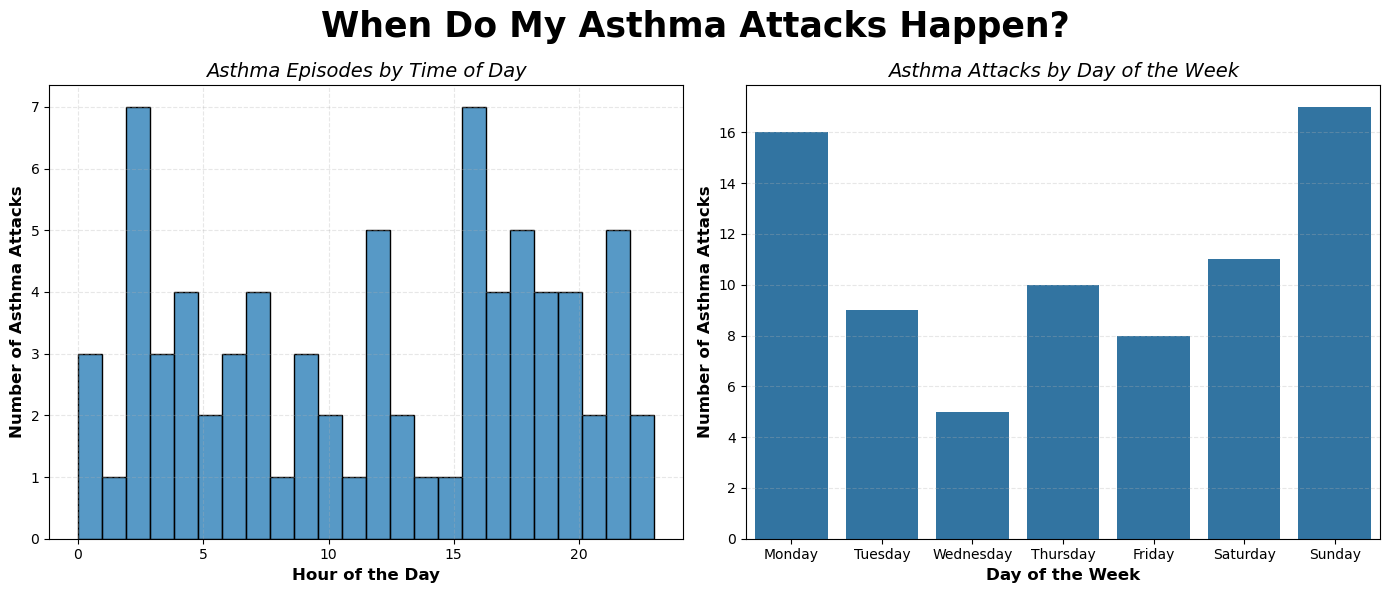

In [43]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Asthma Episodes by Time of Day
sns.histplot(df_encoded["EpisodeTimeStamp"].dt.hour.dropna(), bins=24, kde=False, ax=axes[0])
axes[0].set_title("Asthma Episodes by Time of Day", fontsize=14, fontstyle="italic")
axes[0].set_xlabel("Hour of the Day", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Number of Asthma Attacks", fontsize=12, fontweight="bold")
axes[0].grid(True, linestyle="--", alpha=0.3)

# Asthma Attacks by Day of the Week
sns.countplot(x=df["Day"], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ax=axes[1])
axes[1].set_title("Asthma Attacks by Day of the Week", fontsize=14, fontstyle="italic")
axes[1].set_xlabel("Day of the Week", fontsize=12, fontweight="bold")
axes[1].set_ylabel("Number of Asthma Attacks", fontsize=12, fontweight="bold")
axes[1].grid(axis='y', linestyle="--", alpha=0.3)  # Only grid on y-axis to avoid clutter

plt.suptitle("When Do My Asthma Attacks Happen?", fontsize = 25, fontweight = "bold")
# Adjust layout
plt.tight_layout()
plt.show()

**Insights:**
- There are noticeable peaks in asthma attacks around 3-4 AM and 4-5 PM, which might relate to my messed up body clock at times.
- Early morning episodes could be linked to nighttime airway constriction, while late afternoon episodes may be influenced by daily exertion or environmental exposure.
- The highest number of attacks occur on Mondays and Sundays, possibly due to stress (Monday blues) and lifestyle factors like weekend activities or routine changes.

**Recommendations:**
- Prioritize Sufficient Rest
    - Disrupted sleep can contribute to asthma exacerbations. Aim for a consistent bed time and at least 7-9 hours of sleep per night to support better lung function and reduce nighttime attacks.
- Consider tracking late afternoon/evening activities to identify potential triggers.

---

## **5. Conclusion**


Throughout this journey of analyzing my personal asthma, we’ve uncovered valuable insights that go beyond mere numbers, transforming data into actionable impactful recommendations for better asthma management. What began as a simple analysis of asthma triggers evolved into a deeper understanding of how factors like sleep, stress, temperature, seasonality, and physiological responses shape the way asthma attacks unfold. This knowledge has the potential to make a significant difference in managing and even preventing severe asthma episodes.

While there are existing studies on asthma and common triggers, every individual’s asthma is unique, and so are their triggers. In my analysis, we explored how specific factors and asthma-related symptoms directly impact my asthma. Understanding these unique triggers is crucial—not just for better management but for potentially life-saving interventions.

Ultimately, this project underscores the need for personalized asthma care. It’s crucial to collaborate with healthcare providers, especially if sleep issues arise, to develop tailored strategies. With the right knowledge and proactive management, we can take control of asthma and improve quality of life.

---

## **6. Appendix:**

#### **Decisions: Data Cleaning and Preprocessing**

**Column Removals**:
- **Dropped Columns:**  
  - *Location*, *Note*, *Oxygen_During_Neb (%)*: These were removed as they didn't provide significant value or were redundant.
  
  **Rationale:** These columns were dropped to streamline the dataset and focus on relevant features.

**Dropping** *Position_Context* **Column from** *df_encoded*:
- **Removed Column:** *Position_Context*  
  **Reason:** This column would have resulted in around 9 additional columns after OneHot Encoding, increasing dimensionality unnecessarily.

  **Rationale:** Keeping the dataset more manageable for better analysis.

**Data Transformation:**
- **Binary Encoding:**  
  For Yes/No variables, I used binary encoding (0 or 1).

- **Ordinal Encoding:**  
  The *Day* column was encoded ordinally to preserve its natural order.

- **OneHot Encoding:**  
  For *Episode_Position*, which lacks a natural order, I applied OneHot encoding to treat each position as a separate category.

**Handling Outliers:**
- **Winsorization vs. IQR:**  
  **Reason for Winsorization:** The feature-engineered column had a disproportionate effect on the mean. Winsorization caps extreme values instead of removing them, retaining important data while reducing their impact.

---

**Cleaned Data Columns**

| Column Name             | Description                                                                 |
|-------------------------|-----------------------------------------------------------------------------|
| EpisodeTimeStamp        | The timestamp when the asthma episode occurred.                             |
| Day                     | The day of the week when the episode occurred.                              |
| Temperature (F)         | The recorded ambient temperature (in Fahrenheit) at the time of the asthma episode. |
| NebulizeTimeStamp       | The timestamp when nebulization was initiated.                              |
| Oxygen_Before_Neb (%)   | The oxygen saturation level (%) measured before nebulization.               |
| Oxygen_After_Neb (%)    | The oxygen saturation level (%) measured after nebulization.               |
| HeartRate (BPM)         | The heart rate (in beats per minute) recorded during the episode.          |
| ECG                     | Smartwatch ECG result recorded during the asthma episode (1-lead ECG reading). |
| Neb_Worked              | Whether the nebulizer treatment was effective in relieving symptoms (Yes/No). |
| Wheezing                | Whether wheezing was present during the asthma episode (Yes/No).            |
| Fatigue                 | Presence of fatigue before or during the asthma episode (Yes/No).           |
| Sneeze                  | Whether sneezing occurred before the asthma episode (Yes/No).              |
| StressingEvent          | Any notable stress-related events that occurred before the asthma episode. |
| HoursOfSleep            | The number of hours slept before the episode.                               |
| Food                    | Whether I was full or stuffed, as I sometimes had difficulty breathing when full. |
| Vitamin C               | Whether Vitamin C was consumed before the episode (Yes/No).                |
| Vitamin D               | Whether Vitamin D was consumed before the episode (Yes/No).                |
| Simvastatin             | Whether Simvastatin (a medication) was taken before the episode (Yes/No).  |
| Episode_Position_Sitting | The body position when the asthma symptoms began (Sitting, Laying, Standing). |
| Episode_Position_Sleeping | The body position when the asthma symptoms began (Sitting, Laying, Standing). |
| Episode_Position_Standing | The body position when the asthma symptoms began (Sitting, Laying, Standing). |
| Time_to_Nebulize        | The time before nebulization (minutes), a derived feature to analyze the escalation time of asthma attacks. |

**Feature Engineered Columns**

| Column Name             | Description                                                                 |
|-------------------------|-----------------------------------------------------------------------------|
| Time_to_Nebulize        | The time before nebulization (minutes), a derived feature to analyze the escalation time of asthma attacks. |

---

In [44]:
end_time = time.time()  # Record the end time
total_time = end_time - start_time  # Calculate total time
print(f"Total execution time: {total_time:.2f} seconds")  # Print total time

Total execution time: 2.64 seconds


## End